In [2]:
# Scientific and Data Manipulation Libraries 

import pandas as pd
import numpy as np

import pandas_profiling
from pandas_profiling import ProfileReport


from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

# Data Preprocessing, Machine Learning and Metrics Libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression




#from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.io as pio
#import plotly.graph_objects as go
#import plotly.express as px
%matplotlib inline

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")


In [3]:
#importing data
train=pd.read_csv('D:\\Hackathon\\HR Analytics\\train.csv')
test=pd.read_csv('D:\\Hackathon\\HR Analytics\\test.csv')

In [4]:
#Checking shape of datasets
print('Train Shape:',train.shape)
print('Test Shape:',test.shape)

Train Shape: (54808, 14)
Test Shape: (23490, 13)


In [5]:
#Checking different columns and its datatype along with non-null values count
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None
<class '

In [6]:
#adding new column data_type in both datasets and filling is_promoted in test dataset with na
train['data_type']='train'
test['data_type']='test'
test['is_promoted']='na'

In [7]:
#merging both dataset to a single dataset
id_all=pd.concat([train,test],axis=0,ignore_index=True)

In [8]:
id_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           78298 non-null  object 
 14  data_type             78298 non-null  object 
dtypes: float64(1), int6

In [9]:
#Checking Null values in all columns
id_all.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
data_type                  0
dtype: int64

In [10]:
#filling null values with mean and median of the column depending on the columns datatype
id_all['previous_year_rating']=id_all.loc[id_all['data_type']=='train','previous_year_rating'].mean()
id_all['education']=id_all.loc[id_all['data_type']=='train','previous_year_rating'].median()

In [11]:
# imputing missing values
#for col in id_all.columns:
#     if id_all[col].isnull().sum()>0:
#            id_all.loc[id_all[col].isnull(),col]=id_all.loc[id_all['data_type']=='train',col].mean()

In [12]:
#selecting only object datatype columns with excluding 2 columns
cat_col=id_all.select_dtypes(include=['object']).columns
cat_vars=[_ for _ in cat_col if _ not in ['data_type','is_promoted']]
cat_vars

['department', 'region', 'gender', 'recruitment_channel']

In [13]:
#selecting only numeric datatype columns with excluding 2 columns
num_col=id_all.select_dtypes(include=['int64','float64']).columns
num_vars=[_ for _ in num_col if _ not in ['employee_id','is_promoted']]
num_vars

['education',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [14]:
#creating new columns based on categorical values in the columns
for col in cat_vars:
    dummy=pd.get_dummies(id_all[col],drop_first=True,prefix=col)
    dummy=dummy.astype(int)
    id_all=pd.concat([id_all,dummy],axis=1)
    del id_all[col]
    del dummy
    id_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   region                        78298 non-null  object 
 2   education                     78298 non-null  float64
 3   gender                        78298 non-null  object 
 4   recruitment_channel           78298 non-null  object 
 5   no_of_trainings               78298 non-null  int64  
 6   age                           78298 non-null  int64  
 7   previous_year_rating          78298 non-null  float64
 8   length_of_service             78298 non-null  int64  
 9   KPIs_met >80%                 78298 non-null  int64  
 10  awards_won?                   78298 non-null  int64  
 11  avg_training_score            78298 non-null  int64  
 12  is_promoted                   78298 non-null  object 
 13  d

In [15]:
#transforming data in numerical columns to remove impact of outliers
for col in num_vars:
    scaler = StandardScaler()
    id_all[num_vars] = scaler.fit_transform(id_all[num_vars])
#df_scaled = pd.DataFrame(df_scaled, columns=num_vars)
#print("Scaled Dataset Using MinMaxScaler")
id_all.head()

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.0,-0.417590,0.026400,0.0,0.506357,1.350779,-0.153613,-1.072184,0,...,0,0,0,0,1,0,0,0,0,1
1,65141,0.0,-0.417590,-0.625841,0.0,-0.435253,-0.740314,-0.153613,-0.250282,0,...,0,0,0,0,0,0,0,1,0,0
2,7513,0.0,-0.417590,-0.104048,0.0,0.270954,-0.740314,-0.153613,-0.997466,0,...,0,0,0,0,0,0,0,1,0,1
3,2542,0.0,1.230501,0.548193,0.0,0.977162,-0.740314,-0.153613,-0.997466,0,...,0,0,0,0,0,0,0,1,0,0
4,48945,0.0,-0.417590,1.330882,0.0,-0.906058,-0.740314,-0.153613,0.721058,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#dropping employee_id columns as it is of no use in calculations
id_all=id_all.drop(['employee_id'],1)

In [17]:
# separating data again in two different datasets
id_train=id_all[id_all['data_type']=='train']
id_train=id_train.drop(['data_type'],1)
id_test=id_all[id_all['data_type']=='test']
id_test=id_test.drop(['data_type','is_promoted'],1)

In [18]:
#Checking shapes of new datasets
id_train.shape,id_test.shape

((54808, 53), (23490, 52))

In [19]:
#Creating X and y from id_train dataset
X=id_train.drop(['is_promoted'],1)
y=id_train['is_promoted'].astype('int')

In [23]:
#Using train_test_split to split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
print(y_train.shape, y_test.shape, X_train.shape, X_test.shape)

(43846,) (10962,) (43846, 52) (10962, 52)


# LogisticRegression

In [25]:
#Using logistic regression and evaluating the performance in both train and test datasets
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.5f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.5f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.93117
Test set accuracy: 0.93240


In [26]:
#pred=gridlr.predict(X_test)
#y_pred = logreg.predict_proba(X_test)
#print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
#print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
#print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

In [27]:
#Using parameter to tune up
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':[.0001,.0005,.001,.005,.01,.05,.1,1,2,5,20,50,100]}

In [28]:
#also using GridSearch
model=LogisticRegression()
grid_search=GridSearchCV(model,
                         param_grid=params,
                         cv=3,
                         scoring="roc_auc",
                         n_jobs=-1,
                         verbose=20)

In [29]:
#finding the performance
gridlr=grid_search.fit(X_train, y_train)
print("Training set accuracy: {:.5f}".format(gridlr.score(X_train, y_train)))
print("Test set accuracy: {:.5f}".format(gridlr.score(X_test, y_test)))

Fitting 3 folds for each of 52 candidates, totalling 156 fits
Training set accuracy: 0.87377
Test set accuracy: 0.87849


Not a good model,let's try sth else

# KNN

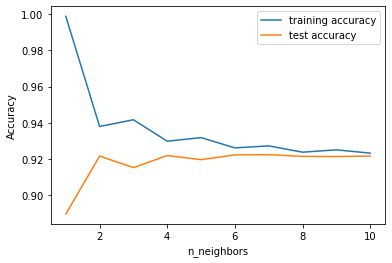

In [30]:
#finding best neighbour
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [31]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.5f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.5f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92378
Accuracy of K-NN classifier on test set: 0.92146


# DecisionTreeClassifier

In [32]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.897


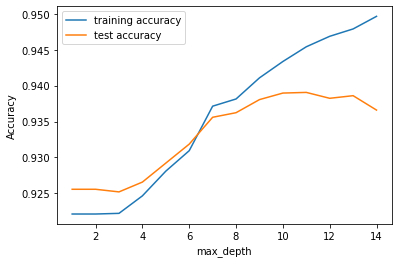

In [33]:
#finding best max_depth
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
max_depth_settings = range(1, 15)

for max_depth in max_depth_settings:
    # build the model
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(tree.score(X_test, y_test))

plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.savefig('tree_compare_model')

In [35]:
#Checking performance with optimized max_depth
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.931
Accuracy on test set: 0.932


# RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.935


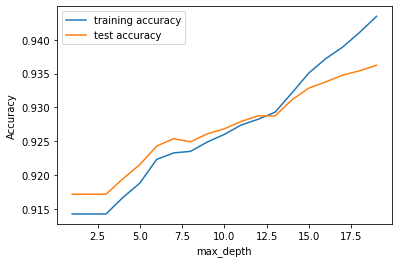

In [37]:
#finding best max_depth
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
max_depth_settings = range(1, 20)

for max_depth in max_depth_settings:
    # build the model
    rf = RandomForestClassifier(max_depth=max_depth, random_state=0,n_estimators=100)
    rf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(rf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(rf.score(X_test, y_test))

plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.savefig('rf_compare_model')

In [39]:
#Checking with optimized max_depth
rf1 = RandomForestClassifier(max_depth=13, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.929
Accuracy on test set: 0.929


# GradientBoostingClassifier

In [67]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.940
Accuracy on test set: 0.941


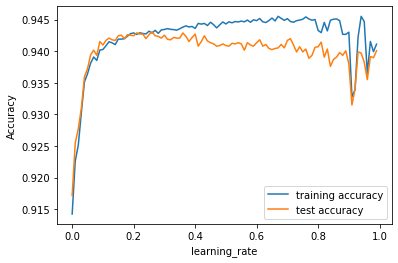

In [41]:
#finding best learning_rate
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
learning_rate_settings = np.arange(0,1,.01)

for learning_rate in learning_rate_settings:
    # build the model
    gb = GradientBoostingClassifier(learning_rate=learning_rate, random_state=0)
    gb.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(gb.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(gb.score(X_test, y_test))

plt.plot(learning_rate_settings, training_accuracy, label="training accuracy")
plt.plot(learning_rate_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()
plt.savefig('gb_compare_model')

In [42]:
#Using best learning rate
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=.2)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.942


# Support Vector Classification

In [43]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.94


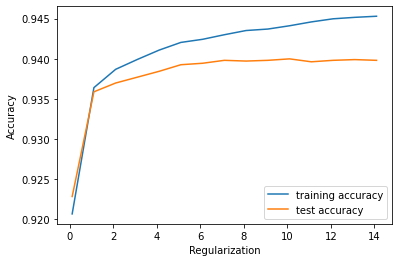

In [44]:
#finding best Regularization
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
learning_rate_settings = np.arange(0.1,15,1)

for C in learning_rate_settings:
    # build the model
    svc = SVC(C=C,random_state=42)
    svc.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(svc.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(svc.score(X_test, y_test))

plt.plot(learning_rate_settings, training_accuracy, label="training accuracy")
plt.plot(learning_rate_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Regularization")
plt.legend()
plt.savefig('SVC_compare_model')

# Multi-layer Perceptron classifier.

In [45]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.5f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94978
Accuracy on test set: 0.93277


In [46]:
mlp1 = MLPClassifier(max_iter=50, random_state=45)
mlp1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp1.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.941


In [55]:
mlp2 = MLPClassifier(max_iter=50, alpha=.01, random_state=42)
mlp2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.941


In [56]:
mlp3 = MLPClassifier(max_iter=12, alpha=0.002, random_state=42)
mlp3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp3.score(X_test, y_test)))

Accuracy on training set: 0.941
Accuracy on test set: 0.942


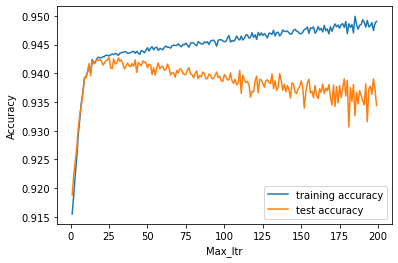

In [57]:
#finding best max_iter_settings
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
max_iter_settings = np.arange(1,200,1)

for max_iter in max_iter_settings:
    # build the model
    mlp4 = MLPClassifier(max_iter=max_iter,random_state=0)
    mlp4.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(mlp4.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(mlp4.score(X_test, y_test))

plt.plot(max_iter_settings, training_accuracy, label="training accuracy")
plt.plot(max_iter_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_Itr")
plt.legend()
plt.savefig('mlp_compare_model')

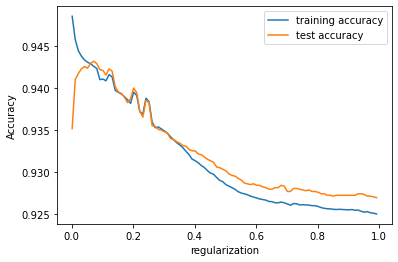

In [59]:
#finding best Regularization
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
regularization = np.arange(.001,1,.01)

for alpha in regularization:
    # build the model
    mlp5 = MLPClassifier(alpha=alpha,random_state=0)
    mlp5.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(mlp5.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(mlp5.score(X_test, y_test))

plt.plot(regularization, training_accuracy, label="training accuracy")
plt.plot(regularization, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("regularization")
plt.legend()
plt.savefig('mlp_regularization_model')

In [64]:
#Using optimized max_it and alpha
mlp6 = MLPClassifier(max_iter=20, alpha=0.1, random_state=42)
mlp6.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp6.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp6.score(X_test, y_test)))

Accuracy on training set: 0.941
Accuracy on test set: 0.942


In [66]:
# Performing oversampling on gradient boost
from collections import Counter
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.2, random_state= 42)

Resampled shape of X:  (100280, 52)
Resampled shape of Y:  (100280,)
Counter({0: 50140, 1: 50140})


In [68]:
# Building the gradient boost classifier on the new dataset

rf_resampled = GradientBoostingClassifier(random_state=0, learning_rate=.2)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
gradient_boost_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [70]:
print("Accuracy on training set: {:.3f}".format(rf_resampled.score(train_X, train_Y)))
print("Accuracy on test set: {:.3f}".format(rf_resampled.score(test_X, test_Y)))

Accuracy on training set: 0.908
Accuracy on test set: 0.906


# Resampling doesnot give good result

In [71]:
predictrff=rf_resampled.predict(id_test)

In [72]:
predl=rf_resampled.predict(X_test)
f1_score(y_test,predl)

0.4151967435549525

In [73]:
pd.DataFrame(predictrff).to_csv("HR_Analytics_rf_resampled.csv",index=False)

In [64]:
# Displaya Descriptive Statistics of Train and Test data
display('Train Description :',train.describe())
display('Test  Description :',test.describe())

'Train Description :'

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


'Test  Description :'

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


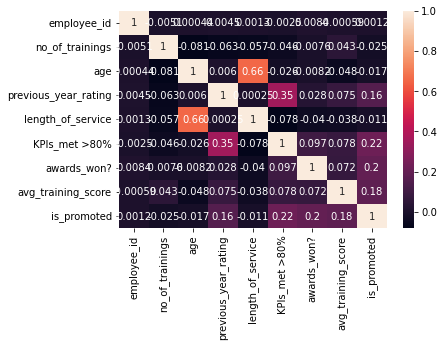

In [67]:
# Displays Correlation between Features through HeatMap - Ligther Color means Higher Correlation
sns.heatmap(train.corr(), annot = True);

In [68]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data
remove_duplicate(train)

'Checked Duplicates'

In [ ]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column } = Encoder.fit_transform(tuple(encoding_data[ column }))
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
    dtypes_list =['float64','float32','int64','int32'}
    encoding_data.astype( dtypes_list[0} ).dtypes
    return encoding_data
encoding_columns  = [ "region", "age","department", "education", "gender", "recruitment_channel" }
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"}
X_train_encode = data_encoding( encoding_strategy[1} , X_train , encoding_columns )
X_test_encode =  data_encoding( encoding_strategy[1} , X_test  , encoding_columns )
# Display Encoded Train and Test Features :
display(X_train_encode.head())
display(X_test_encode.head())

In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns} = RobustScaler().fit_transform(scaling_data[scaling_columns})
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns} = StandardScaler().fit_transform(scaling_data[scaling_columns})
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns} = MinMaxScaler().fit_transform(scaling_data[scaling_columns})
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns} = MaxAbsScaler().fit_transform(scaling_data[scaling_columns})
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns} = RobustScaler().fit_transform(scaling_data[scaling_columns})
    return scaling_data
# RobustScaler is better in handling Outliers :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"}
X_train_scale = data_scaling( scaling_strategy[0} , X_train_encode , X_train_encode.columns )
X_test_scale  = data_scaling( scaling_strategy [0} , X_test_encode  , X_test_encode.columns )
# Display Scaled Train and Test Features :
display(X_train_scale.head())
display(X_train_scale.columns)
display(X_train_scale.head())